In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import line

#### 1. Datensatz einlesen

In [3]:
df = pd.read_csv('compact.csv')
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


#### 2. Überblick über Daten 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451759 entries, 0 to 451758
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     451759 non-null  object 
 1   date                                        451759 non-null  object 
 2   total_cases                                 439500 non-null  float64
 3   new_cases                                   437518 non-null  float64
 4   new_cases_smoothed                          436292 non-null  float64
 5   total_cases_per_million                     439500 non-null  float64
 6   new_cases_per_million                       437518 non-null  float64
 7   new_cases_smoothed_per_million              436292 non-null  float64
 8   total_deaths                                439500 non-null  float64
 9   new_deaths                                  438051 non-null  float64
 

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,4.395000e+05,4.375180e+05,4.362920e+05,439500.000000,437518.000000,436292.000000,4.395000e+05,438051.000000,436817.000000,439500.000000,...,4.364090e+05,429370.000000,431135.000000,431135.000000,352265.000000,283800.000000,380455.000000,204480.000000,271861.000000,361600.00000
mean,1.267393e+07,1.238975e+04,1.242381e+04,115968.015256,116.260119,116.578475,1.437773e+05,118.255404,118.580354,853.869316,...,1.311368e+08,392.389153,31.165374,72.305324,22509.590505,11.086191,9.042714,59.104163,3.182145,0.72561
std,6.832702e+07,2.891058e+05,1.088186e+05,165591.375695,1465.235608,543.975661,7.352299e+05,2135.555667,800.809542,1140.500470,...,6.691025e+08,1787.349576,9.676967,7.466687,22551.350144,18.370840,5.236898,31.901648,2.566288,0.15397
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,52.525400,708.178300,0.000000,1.100000,3.440189,0.300000,0.38000
25%,7.168000e+03,0.000000e+00,0.000000e+00,2226.895825,0.000000,0.000000,5.100000e+01,0.000000,0.000000,27.471620,...,4.553740e+05,36.265860,22.244000,67.239800,5155.620000,0.243796,5.600000,26.200474,1.320000,0.60800
50%,7.027400e+04,0.000000e+00,1.100000e+01,32207.863000,0.000000,2.389737,8.705000e+02,0.000000,0.000000,331.913880,...,6.280316e+06,92.084660,31.683000,73.472700,14572.607000,1.318269,7.400000,70.153600,2.600000,0.74100
75%,9.757900e+05,0.000000e+00,3.221786e+02,160119.170000,0.000000,51.307000,1.093000e+04,0.000000,3.142857,1326.167400,...,3.039500e+07,237.471000,39.080000,78.210700,34663.496000,15.617013,11.100000,88.469350,4.260000,0.84900
max,7.767536e+08,4.423623e+07,6.319461e+06,767015.700000,241758.230000,34536.890000,7.073453e+06,103719.000000,14817.000000,6601.109400,...,8.021407e+09,21344.213000,59.875000,85.946300,117746.990000,80.730060,30.800000,100.000000,13.800000,0.96700


#### 3. Datenbereinigung

**3.1 Überprüfung auf fehlende Werte**

In [6]:
df.isnull().sum()

country                            0
date                               0
total_cases                    12259
new_cases                      14241
new_cases_smoothed             15467
                               ...  
extreme_poverty               167959
diabetes_prevalence            71304
handwashing_facilities        247279
hospital_beds_per_thousand    179898
human_development_index        90159
Length: 61, dtype: int64

In [7]:
df.isna().sum()

country                            0
date                               0
total_cases                    12259
new_cases                      14241
new_cases_smoothed             15467
                               ...  
extreme_poverty               167959
diabetes_prevalence            71304
handwashing_facilities        247279
hospital_beds_per_thousand    179898
human_development_index        90159
Length: 61, dtype: int64

**Entfernung Zeilen mit fehlenden Werten**

In [8]:
#df_no_na = df.dropna(inplace=True)

**Ersetzen fehlender Werte durch 0**

In [9]:
#df_filled = df.fillna(0, inplace=True)

In [10]:
#print(df_filled)

**3.2 Überprüfng auf Duplikate**

In [11]:
df.duplicated().sum() #zeigt duplizierte Zeilen an

np.int64(0)

**3.3 There is a mix of ISO codes: separate out the country codes from the others**

In [12]:
#country_codes = codes = {code for code in df['iso_code'].unique() if len(code) == 3}
#not_china = {code for code in country_codes if code != 'CHN'}

In [13]:
#line(data_frame=df[~df['iso_code'].isin(country_codes)], x='date', y='new_cases_smoothed', color='iso_code', log_y=False).show()
#line(data_frame=df[df['iso_code'].isin(country_codes)], x='date', y='new_cases_smoothed', color='iso_code', log_y=False).show()
#line(data_frame=df[df['iso_code'].isin(not_china)], x='date', y='new_cases_smoothed', color='iso_code', log_y=False).show()

#### 4. Neue Spalten erstellen

In [14]:
# Inzidenzrate pro 100.000 Einwohner
df['inzidenzrate_pro_100000'] = (df['total_cases'] / df['population']) * 100000

# Todesrate (Case Fatality Rate)
df['todesrate'] = (df['total_deaths'] / df['total_cases']) * 100

# Wachstumsrate der Fälle (im Vergleich zum Vortag)
df['wachstumsrate'] = df['new_cases'].pct_change() * 100

# Anteil der Geimpften
df['anteil_geimpfter'] = (df['total_vaccinations'] / df['population']) * 100

# Anzahl der aktiven Fälle
# Wir setzen hier voraus, dass es eine Spalte "total_recoveries" gibt, die Gesamtzahl der Genesenen darstellt.
if 'total_recoveries' in df.columns:
    df['aktive_faelle'] = df['total_cases'] - (df['total_deaths'] + df['total_recoveries'])
else:
    # Wenn keine Genesungsdaten vorhanden sind, lassen wir die aktiven Fälle weg
    df['aktive_faelle'] = np.nan

# Bereinigtes Dataset mit neuen Spalten anzeigen
df.head()

/var/folders/1k/gzrlf3f10w9fdlpn36dljwfc0000gn/T/ipykernel_12283/3849404669.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['wachstumsrate'] = df['new_cases'].pct_change() * 100


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,inzidenzrate_pro_100000,todesrate,wachstumsrate,anteil_geimpfter,aktive_faelle
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,10.9,48.214695,0.39,0.462,0.0,NaN,NaN,NaN,NaN


#### 5. Datum konvertieren und Plotten

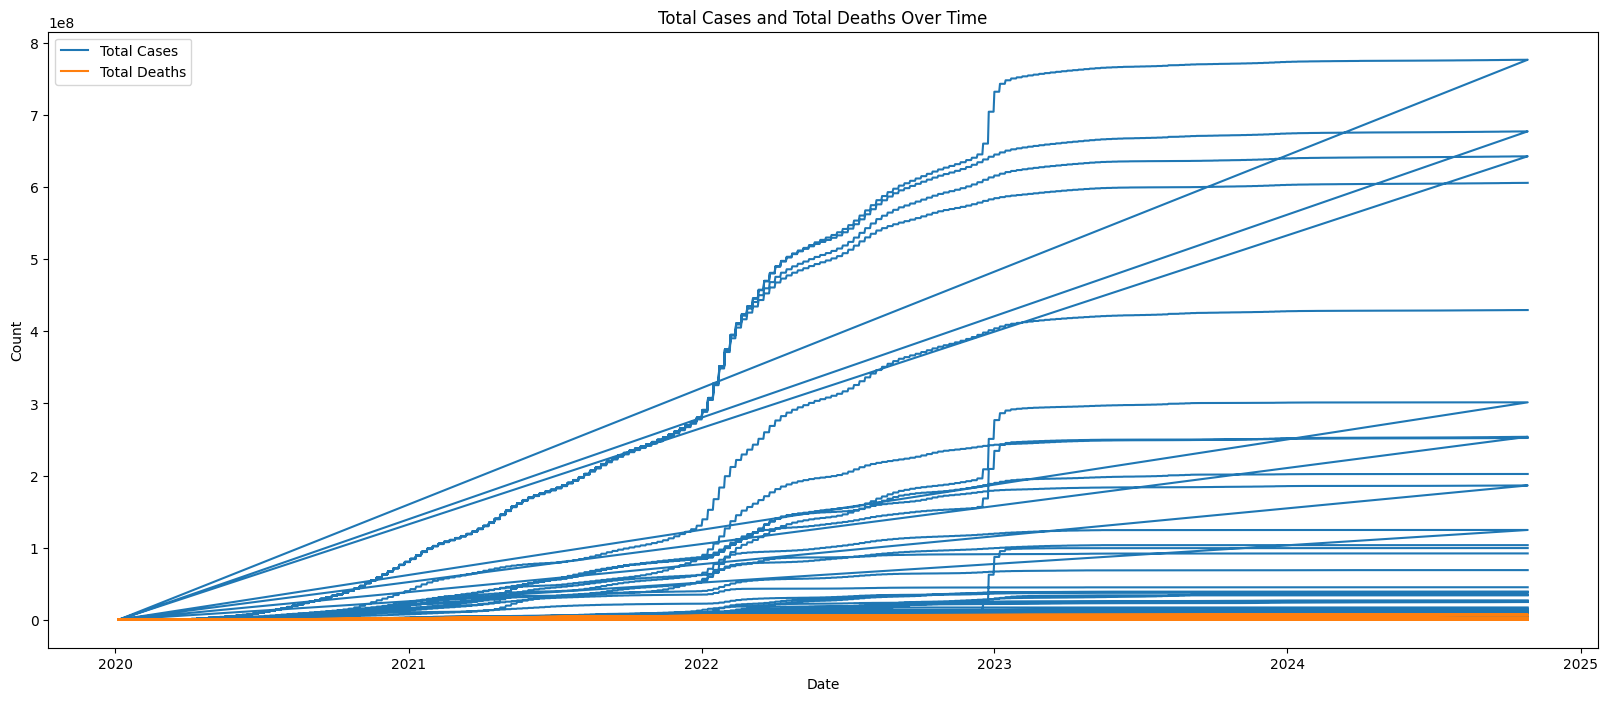

In [15]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Plot time series data
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['total_cases'], label='Total Cases')
plt.plot(df['date'], df['total_deaths'], label='Total Deaths')
plt.title('Total Cases and Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#### 6. Korrelationsmatrix

- Analyse von Zusammenhängen zwischen verschiedenen Variablen
- Die Zellen der Matrix enthalten Korrelationskoeffizienten, die Aufschluss über die Stärke und Richtung des Zusammenhangs zwischen je zwei Variablen geben12:
  - Wertebereich: Die Koeffizienten liegen zwischen -1 und +1.
  - Positive Korrelation: Werte > 0 zeigen an, dass die Variablen sich in die gleiche Richtung bewegen.
  - Negative Korrelation: Werte < 0 deuten auf eine gegenläufige Beziehung hin.
  - Stärke: Je näher der Betrag des Koeffizienten an 1 liegt, desto stärker ist der Zusammenhang.

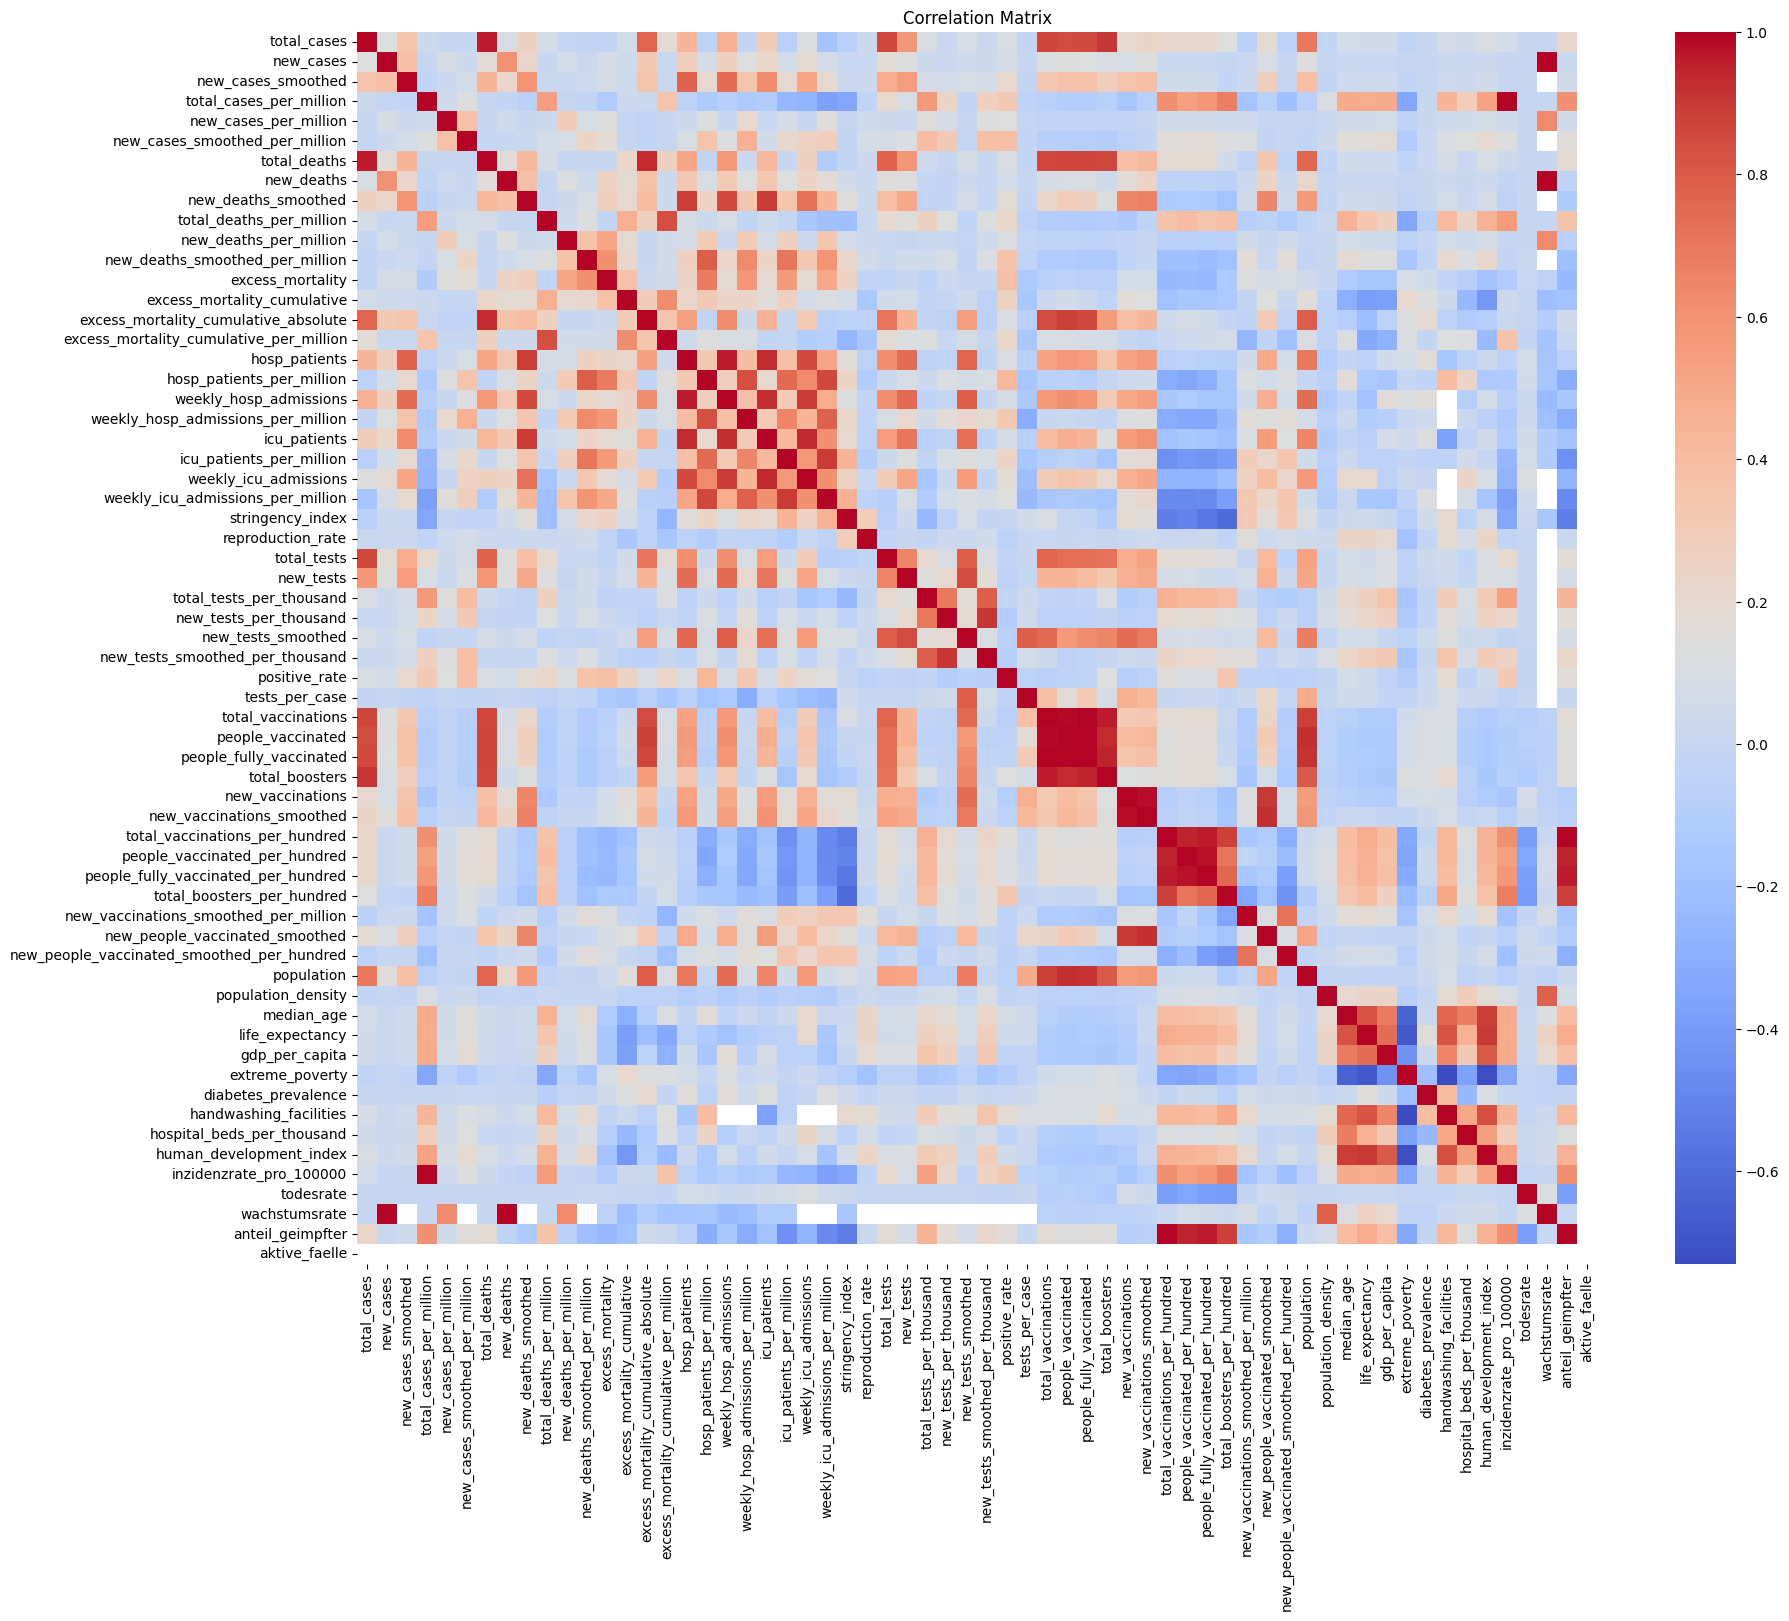

In [16]:
# Exclude non-numeric columns 
numeric_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation with heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

#### 7. Verteilung Plotten

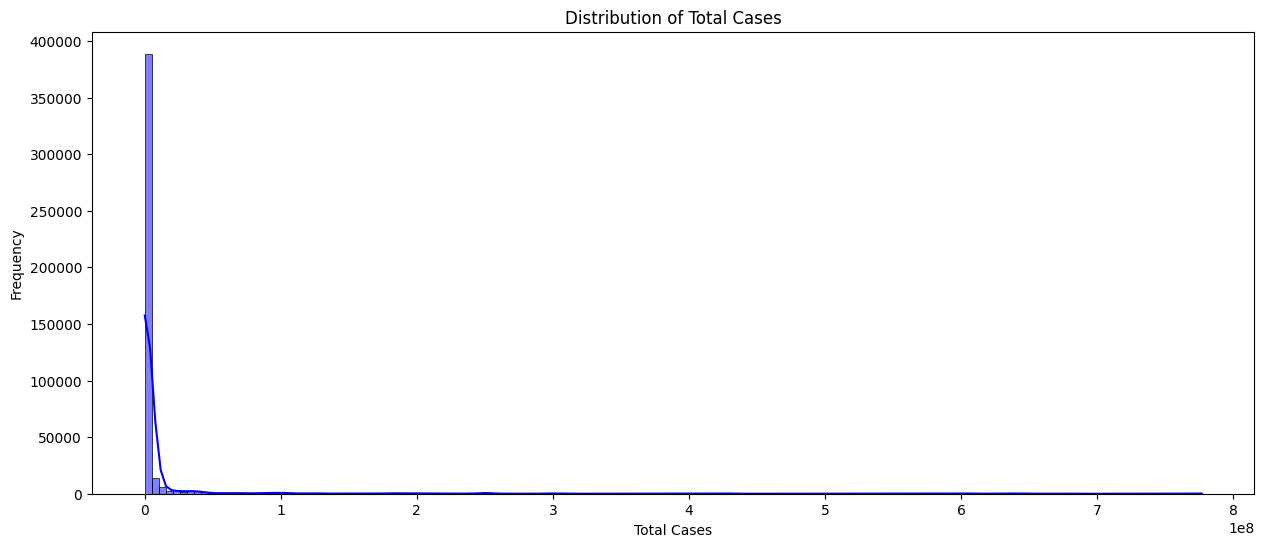

In [17]:
# Plot distribution of selected numerical columns
plt.figure(figsize=(15, 6))
sns.histplot(df['total_cases'].dropna(), kde=True, color='blue', bins=150)
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,inzidenzrate_pro_100000,todesrate,wachstumsrate,anteil_geimpfter,aktive_faelle
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.9,48.214695,0.39,0.462,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,10.9,48.214695,0.39,0.462,0.0,NaN,NaN,NaN,NaN
